# Logistic regression

The FULLEST dataset is used. 

* Pipeline involves scaling
* Train is balanced

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from pickle import load, dump
from eval_metrics_katja import *
import configparser

pd.set_option('display.max_columns', 999)

cfg = configparser.ConfigParser()

## Loading data

In [3]:
df = pd.read_csv('../data/merged_df_full.csv')

In [6]:
cfg.read_file(open('../config.cfg'))

In [26]:
cat_features = cfg.get('PREPROCESSING', 'cat_features').split()
# num_features = cfg.get('PREPROCESSING', 'num_features').split()
num_features = list(set(df.columns) - set(cat_features))
num_features.remove('client_id')
num_features.remove('creation_date')
num_features.remove('target')

In [29]:
X = df[cat_features + num_features]
y = df['target']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    random_state=cfg.getint('GENERAL', 'RandomSeed'))

In [31]:
print(' '.join(num_features))

total_consum_lvl2_mean elec_4_mon_6 elec_3_mon_11 elec_4_mon_2 elec_consum_lvl4_min total_consum_lvl3_max elec_4_mon_11 gaz_4_mon_3 total_consum_lvl4_mean elec_consum_lvl4_max elec_2_mon_6 gaz_3_mon_1 elec_3_mon_10 total_consum_lvl3_min counter_code_mode gaz_2_mon_4 total_consum_lvl3_std gaz_2_mon_9 gaz_consum_lvl2_mean gaz_2_mon_8 elec_1_mon_1 gaz_consum_lvl3_mean gaz_3_mon_2 gaz_consum_lvl3_std gaz_3_mon_7 gaz_4_mon_8 elec_consum_lvl3_max gaz_1_mon_9 total_consum_lvl1_min gaz_consum_lvl4_std gaz_1_mon_11 gaz_4_mon_7 elec_2_mon_8 gaz_1_mon_3 elec_3_mon_8 gaz_acc_dur_years elec_3_mon_9 elec_4_mon_5 acc_creation_year energy_tarif_type_count gaz_2_mon_2 gaz_4_mon_11 elec_consum_lvl4_std elec_2_mon_10 elec_1_mon_9 gaz_4_mon_9 gaz_3_mon_6 elec_3_mon_2 gaz_4_mon_2 gaz_2_mon_7 total_consum_lvl2_max elec_1_mon_10 elec_3_mon_6 gaz_consum_lvl3_min difference_acc_dur elec_1_mon_8 elec_2_mon_1 elec_4_mon_7 elec_2_mon_4 acc_creation_month gaz_2_mon_1 elec_consum_lvl2_mean elec_4_mon_8 elec_2_mon_7

**Run the `pipelines.py`**. Change the features in the config!

In [32]:
pipe_name = 'full_logreg_1'
pipe = load(open(f'../pipelines/{pipe_name}.pkl', 'rb'))

pipe

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer_num',
                                                                                                SimpleImputer(fill_value=999,
                                                                                                              strategy='constant')),
                                                                                               ('std_scaler',
                                                                                                StandardScaler())]),
                                                                               ['total_consum_lvl2_mean',
                                                                                'elec_4_mon_6',
                                                                                'elec_3_mon_11',
                                                                                'elec_4_mon_2',
                                                                                'elec_consum_lvl4_min',
                                                                                'total_consum_lvl3_max',
                                                                                'elec_4_mo...
                                                                                'region',
                                                                                'client_catg',
                                                                                'remark_mode',
                                                                                'gas_tarif_type_mode',
                                                                                'energy_tarif_type_mode',
                                                                                'counter_status_mode',
                                                                                'counter_status_count'])])),
                                             ('logreg',
                                              LogisticRegression(max_iter=1000))]),
                   n_jobs=-1,
                   param_distributions={'logreg__C': [0.001, 0.01, 0.1, 1.0,
                                                      10.0],
                                        'logreg__penalty': ['l1', 'l2'],
                                        'logreg__solver': ['liblinear']},
                   random_state=42, scoring='f1', verbose=3)

**WITHOUT THE GRID SEARCH**

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_pipeline = Pipeline([
    ('1hot', OneHotEncoder(handle_unknown='ignore')),
    ('imputer_num', SimpleImputer(strategy='constant', fill_value=999)),

])

## for numerical features
num_pipeline = Pipeline([
    ('imputer_num', SimpleImputer(strategy='constant', fill_value=999)),
    ('std_scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])
pipe_logreg = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(penalty='l1', 
                                  solver='liblinear',
                                  C=0.01, max_iter=1000))
])

In [36]:
old_lr = load(open('../models/logreg1.pkl', 'rb'))
old_lr

Fitting (no balancing)

In [47]:
pipe_logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(fill_value=999,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['total_consum_lvl2_mean',
                                                   'elec_4_mon_6',
                                                   'elec_3_mon_11',
                                                   'elec_4_mon_2',
                                                   'elec_consum_lvl4_min',
                                                   'total_consum_lvl3_max',
                                                   'elec_4_mon_11',
                                                   'gaz_4_mon_3',
                                                   'total_consum_...
                                                  Pipeline(steps=[('1hot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer_num',
                                                                   SimpleImputer(fill_value=999,
                                                                                 strategy='constant'))]),
                                                  ['district', 'region',
                                                   'client_catg', 'remark_mode',
                                                   'gas_tarif_type_mode',
                                                   'energy_tarif_type_mode',
                                                   'counter_status_mode',
                                                   'counter_status_count'])])),
                ('logreg',
                 LogisticRegression(C=0.01, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

In [51]:
# saving

dump(pipe_logreg, open('../models/logreg_full_feats_noopt.pkl', 'wb'))

In [52]:
model = load(open('../models/logreg_full_feats_noopt.pkl', 'rb'))
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(fill_value=999,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['total_consum_lvl2_mean',
                                                   'elec_4_mon_6',
                                                   'elec_3_mon_11',
                                                   'elec_4_mon_2',
                                                   'elec_consum_lvl4_min',
                                                   'total_consum_lvl3_max',
                                                   'elec_4_mon_11',
                                                   'gaz_4_mon_3',
                                                   'total_consum_...
                                                  Pipeline(steps=[('1hot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer_num',
                                                                   SimpleImputer(fill_value=999,
                                                                                 strategy='constant'))]),
                                                  ['district', 'region',
                                                   'client_catg', 'remark_mode',
                                                   'gas_tarif_type_mode',
                                                   'energy_tarif_type_mode',
                                                   'counter_status_mode',
                                                   'counter_status_count'])])),
                ('logreg',
                 LogisticRegression(C=0.01, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

In [56]:
model.steps[1][1].feature_importances_

LogisticRegression(C=0.01, max_iter=1000, penalty='l1', solver='liblinear')

In [57]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)
y_score = calculate_y_score(model, X_test)

Recall: 0.02 Precision: 0.31 ROC AUC: 0.83 F-beta: 0.27

                Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     31982
         1.0       0.31      0.02      0.04      1892

    accuracy                           0.94     33874
   macro avg       0.63      0.51      0.50     33874
weighted avg       0.91      0.94      0.92     33874



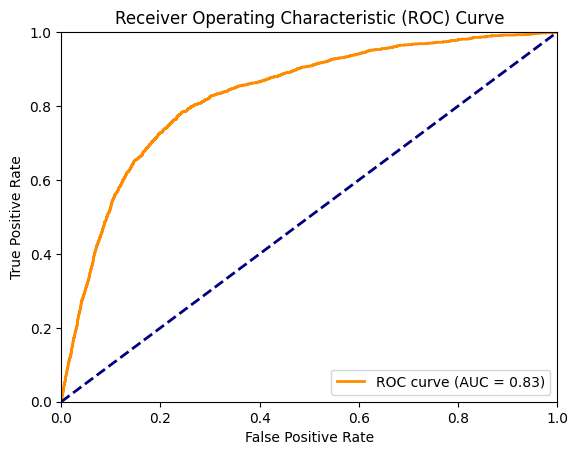

In [58]:
evaluate_one_model(predictions=y_pred,
                   probabilities=y_score,
                   y_test=y_test,
                   )

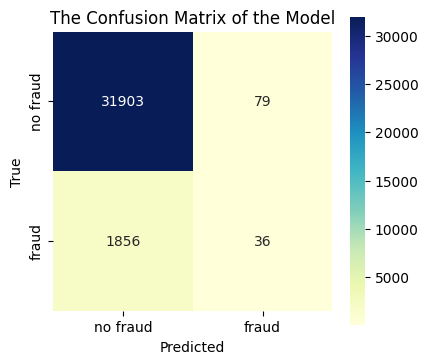

In [59]:
conf_matrix_display(y_test, y_pred)

In [76]:
feature_names = model[:-1].get_feature_names_out()
feature_weights = model[-1].coef_[0]

In [79]:
feature_weights.shape

(222,)

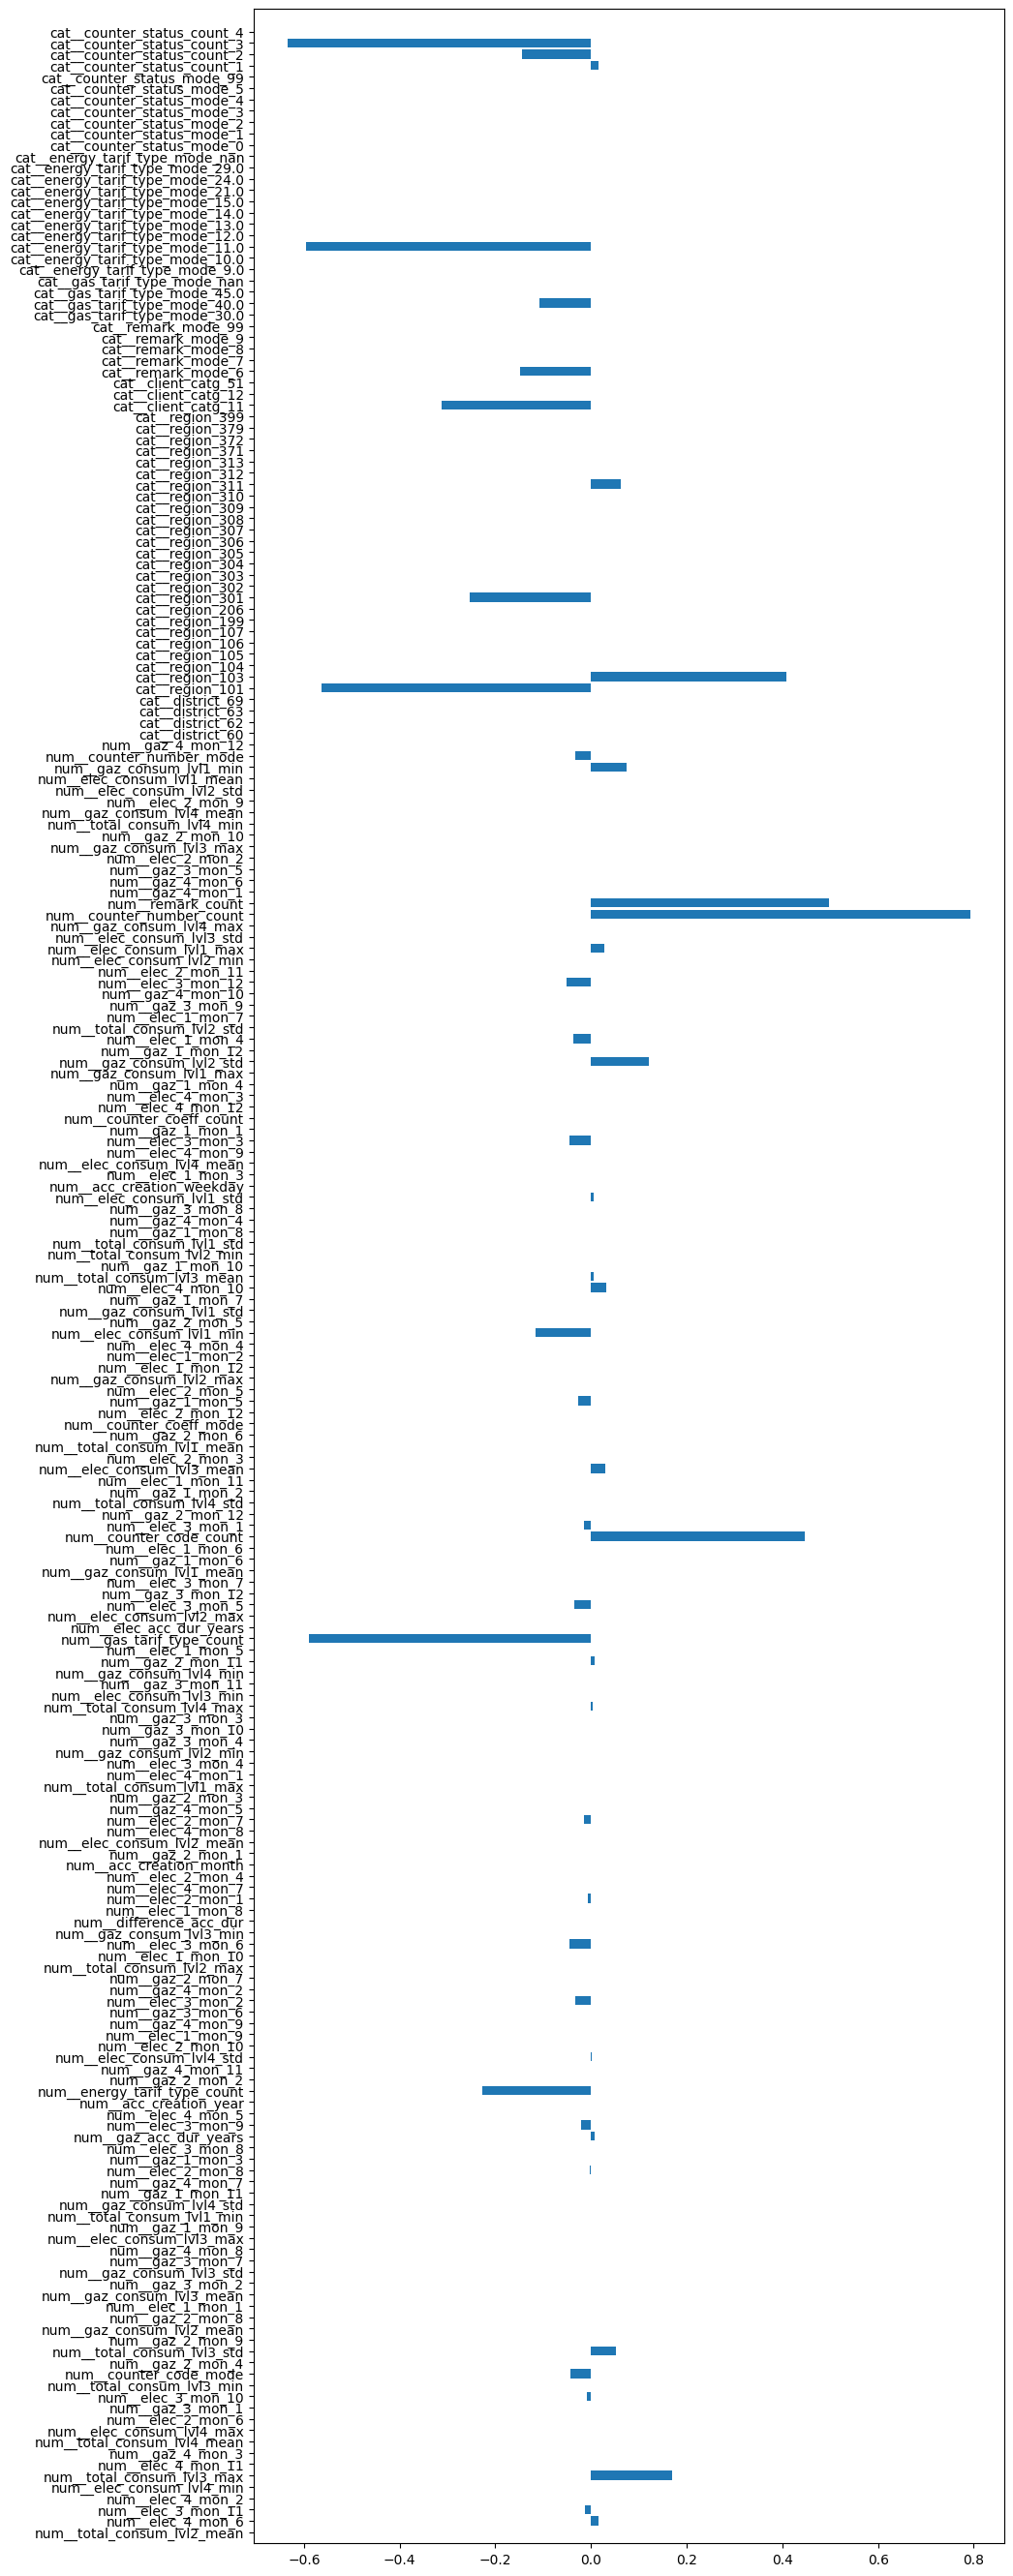

In [81]:
plt.figure(figsize=(10, 34))
plt.barh(range(len(feature_weights)), feature_weights);
plt.yticks(ticks=range(len(feature_weights)),labels=feature_names);
plt.ylim(-1, 223);

# EDA on errors 